In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time


In [2]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 60
batch_size = 100
learning_rate = 0.001

In [3]:
# MNIST dataset (images and labels)
# Images of 28x28
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
#print(len(train_loader), 'trarin size')

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)

In [4]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)


In [5]:
# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [6]:
# Train the model
train_acc_arr= []
train_loss_arr = []
test_acc_arr = []
test_loss_arr = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    t_start = time.time()
    output_compiled= []
    true_compiled = []
    loss_compiled = []
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        true_compiled.extend(labels)
        
        # Forward pass
        outputs = model(images)
        
        train_loss = criterion(outputs, labels)
        loss_compiled.append(train_loss.data.data.item())
        
        # Backward and optimize
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    
        # Compute accuracy
        _, argmax = torch.max(outputs, 1)
        output_compiled.extend(argmax.squeeze())
    
    t_duration = time.time() - t_start
    train_acc = (np.array(true_compiled) == np.array(output_compiled)).mean()
    train_loss = np.array(loss_compiled).mean()
    train_acc_arr.append(train_acc)
    train_loss_arr.append(train_loss)
    print("Epoch [{}/{}], Loss: {:.3f}, Accuracy: {:.3f}, Duration: {:.2f} "
          .format(epoch+1, num_epochs, train_loss, train_acc, t_duration))
    
    test_output_compiled = []
    test_true_compiled = []
    test_loss_compiled = []
    for j, (test_images, test_labels) in enumerate(test_loader):
        test_images = test_images.reshape(-1, 28*28)
        test_true_compiled.extend(test_labels)
        # Forward pass
        test_outputs = model(test_images)
        test_loss = criterion(test_outputs, test_labels)
        test_loss_compiled.append(test_loss.data.data.item())
        
        # Compute accuracy
        _, argmax = torch.max(test_outputs, 1)
        test_output_compiled.extend(argmax.squeeze())
        
    test_acc = (np.array(test_true_compiled) == np.array(test_output_compiled)).mean()
    test_acc_arr.append(test_acc)
    test_loss_arr.append(np.array(test_loss_compiled).mean())


Epoch [1/60], Loss: 2.001, Accuracy: 0.512, Duration: 8.44 
Epoch [2/60], Loss: 1.590, Accuracy: 0.756, Duration: 6.90 
Epoch [3/60], Loss: 1.330, Accuracy: 0.793, Duration: 7.87 
Epoch [4/60], Loss: 1.158, Accuracy: 0.809, Duration: 8.62 
Epoch [5/60], Loss: 1.038, Accuracy: 0.821, Duration: 9.17 
Epoch [6/60], Loss: 0.950, Accuracy: 0.828, Duration: 8.99 
Epoch [7/60], Loss: 0.883, Accuracy: 0.833, Duration: 12.76 
Epoch [8/60], Loss: 0.831, Accuracy: 0.838, Duration: 8.60 
Epoch [9/60], Loss: 0.788, Accuracy: 0.842, Duration: 8.86 
Epoch [10/60], Loss: 0.753, Accuracy: 0.845, Duration: 9.70 
Epoch [11/60], Loss: 0.723, Accuracy: 0.849, Duration: 12.56 
Epoch [12/60], Loss: 0.698, Accuracy: 0.851, Duration: 7.84 
Epoch [13/60], Loss: 0.676, Accuracy: 0.854, Duration: 7.75 
Epoch [14/60], Loss: 0.656, Accuracy: 0.856, Duration: 9.24 
Epoch [15/60], Loss: 0.639, Accuracy: 0.858, Duration: 10.15 
Epoch [16/60], Loss: 0.624, Accuracy: 0.859, Duration: 10.47 
Epoch [17/60], Loss: 0.610, A

In [7]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
#with torch.no_grad():
correct = 0
total = 0
#test_acc_arr = []
#test_loss_arr = []

#for epoch in range(num_epochs):
all_right_images = []
all_wrong_images = []
all_right_labels = []
all_wrong_labels = []
all_right_predicted = []
all_wrong_predicted = []
for images, labels in test_loader:
    #print(images[1],images[1]) #size is 1x1
    images = images.reshape(-1, 28*28)
   
    outputs = model(images)

    #Accuracy
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
  
    for i in range(len(predicted)):
        image_reshape = images[i].reshape(28,28)
        if  predicted[i] != labels[i]:
            # right now is is 1 dimension
            all_wrong_images.append(image_reshape)
            all_wrong_labels.append(labels[i].data.item())
            all_wrong_predicted.append(predicted[i].data.item())
        elif predicted[i] == labels[i]:
            all_right_images.append(image_reshape)
            all_right_labels.append(labels[i].data.item())
            all_right_predicted.append(predicted[i].data.item())
#print(len(all_wrong_predicted))
print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 89 %


In [8]:
import pandas as pd
# pd_all_right_labels = pd.DataFrame(all_right_labels)
# pd_all_right_predicted = pd.DataFrame(all_right_predicted)
# pd_all_wrong_labels = pd.DataFrame(all_wrong_labels)
# pd_all_wrong_predicted = pd.DataFrame(all_wrong_predicted)
# all_test = [pd_all_right_labels, pd_all_right_predicted, pd_all_wrong_labels, pd_all_wrong_predicted]
# final = pd.concat(all_test)
all_labels = all_right_labels + all_wrong_labels
all_predicted = all_right_predicted + all_wrong_predicted
final = pd.DataFrame({"Labels": all_labels,"Predicted": all_predicted})
final.to_csv("testmmodel.csv")

In [9]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [10]:
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

Print out 10 images that the model predcited right

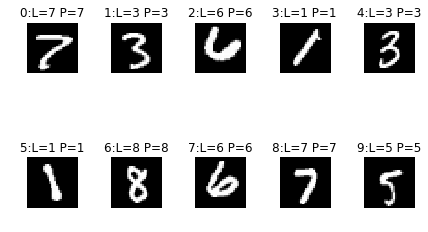

In [11]:
# Plot the some correct images
import random
number_of_im = 10
right_figures = {}
right_index = random.sample(range(0,len(all_right_images)-1),number_of_im)
ID = 0
for i in right_index:
    #index = np.random.randint(0,len(all_right_images)-1)
    #print(index)
    right_figures[str(ID) + ":" + "L=" + str(all_right_labels[i]) + " P=" + str(all_right_predicted[i])] = all_right_images[i]
    ID +=1
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(right_figures, 2, 5)

Print out 10 images that the model predicted wrong. L is the image's label and P is the image's prediction

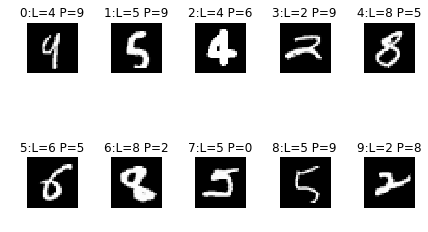

In [12]:
# Plot the some wrong images
number_of_im = 10
wrong_figures = {}
wrong_index = random.sample(range(0,len(all_wrong_images)-1),number_of_im)
ID = 0
for i in wrong_index:
    wrong_figures[str(ID) + ":" + "L=" + str(all_wrong_labels[i]) + " P=" + str(all_wrong_predicted[i])] = all_wrong_images[i]
    ID +=1
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(wrong_figures, 2, 5)

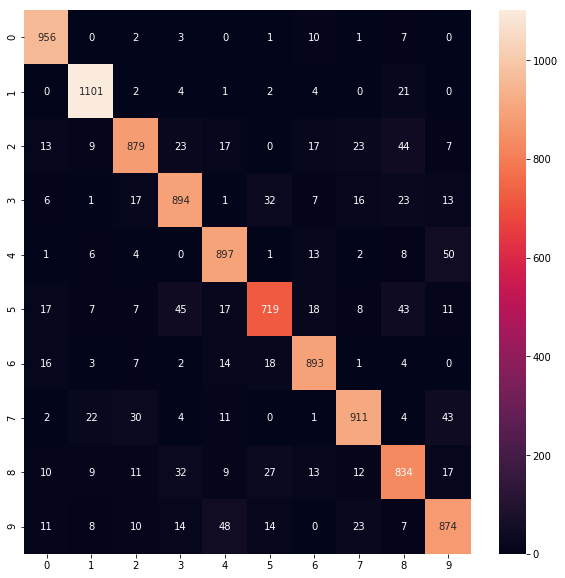

In [19]:
all_labels = all_right_labels + all_wrong_labels
all_predicted = all_right_predicted + all_wrong_predicted
# print((all_labels))
# print((all_predicted))
mat = confusion_matrix(all_labels, all_predicted)
import seaborn as sn
import pandas as pd
label_predict = pd.DataFrame(mat, range(10),range(10))
# sn.set(font_scale=1.2) #for label size
plt.figure(figsize=(10, 10))
#norm_label_predict = (label_predict - label_predict.mean()/label_predict.std())
sn.heatmap(label_predict, annot=True,fmt='g')

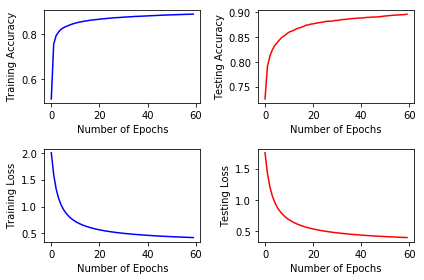

In [14]:
#PLotting accuracy and loss
plt.subplot(2,2,1)
plt.plot(train_acc_arr, 'b')
#plt.set_title("Accuracy plot")
plt.ylabel("Training Accuracy")
plt.xlabel("Number of Epochs")

plt.subplot(2,2,2)
plt.plot(test_acc_arr, 'r')
#plt.set_title("Accuracy plot")
plt.ylabel("Testing Accuracy")
plt.xlabel("Number of Epochs")

plt.subplot(2,2,3)
plt.plot(train_loss_arr, 'b')
#plt.set_title("Accuracy plot")
plt.ylabel("Training Loss")
plt.xlabel("Number of Epochs")

plt.subplot(2,2,4)
plt.plot(test_loss_arr, 'r')
#plt.set_title("Loss Plot")
plt.ylabel("Testing Loss")
plt.xlabel("Number of Epochs")

plt.tight_layout()
plt.show()

In [15]:
print(len(all_wrong_labels))
print(len(all_right_labels))

1042
8958
